## Loading Data and Libraries

In [1]:
library('stm')
library('devtools')
library('tm')
library("Rtsne")
library("rsvd")
library("geometry")

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com
Loading required package: usethis
Loading required package: NLP


In [2]:
load('/home/jovyan/work/swarm/output/stm_select_allvars_image.RData') #load the outputs from selectModel run with all covariates
load('/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData') #load best model
load('/home/jovyan/work/text_analysis/topic_modeling/estimateEffectData.RData') #load outputs from estimateEffect function

In [3]:
#read in table of school websites and school codes
urls <- read.csv('/home/jovyan/work/sorting-schools-2019/data/charter_URLs_2018.csv')

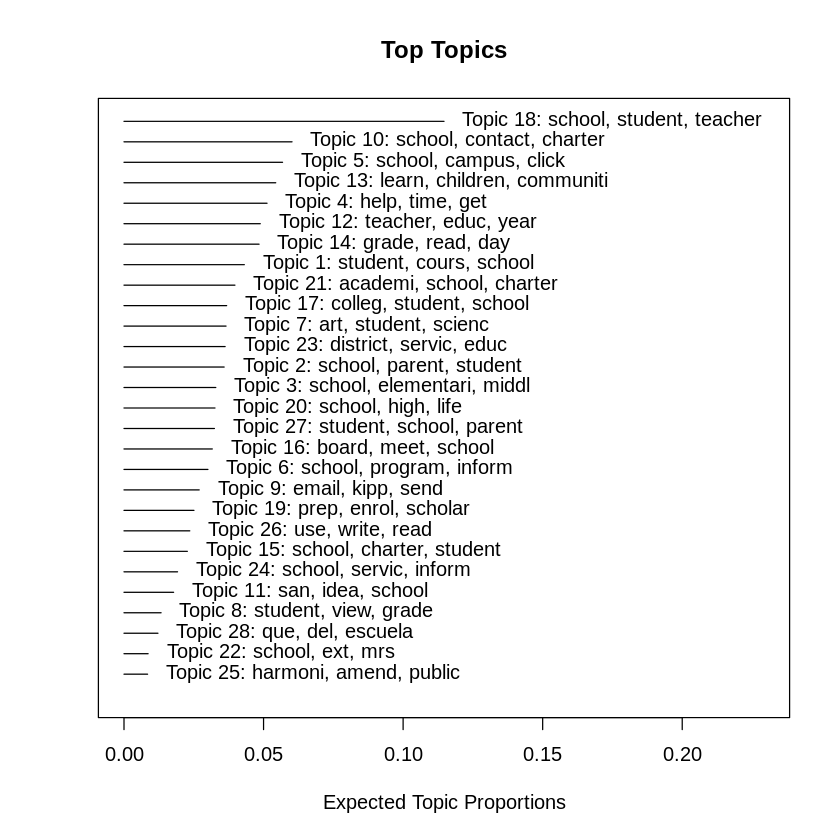

In [4]:
plot(model)

## Topics that differentiate white and black populations

- Topic 10 “Internet/Communication”
- Topic 13 “Holistic Education”
- Topic 14 “Time/Schedules”
- Topic 16 “School Board/ Bureaucracy”
- Topic 17 “Graduation/Futures”

In [6]:
# find the top 3 documents that are most representative for each topic
findThoughtsObj <- findThoughts(model, text= data$master_string, topics= c(10,13,14,16,17),n=3)

Warning message in findThoughts(model, text = data$master_string, topics = c(10, :
“texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future.”

In [10]:
# the documents
findThoughtsObj$docs

$`Topic 10`
[1] "the requested module found system please contact administrator feel reached message error for technical questions comments regarding website please contact webmaster w th st hanford     legal information  privacy policy  site map copyright  all rights reserved web development ies inc w th st hanford phone   fax   legal information  privacy policy  site map ies-web-v copyright  all rights reserved new web development cyberschool  ies inc please wait loading loading failed w th st hanford phone   fax   toggle navigation home month view week view day view year view news current news archived news school list district home armona elementary parkview middle school title close subscribe print view views current news archive news news view posts school year  welcome back new school year adult ed adult ed every friday for technical questions comments regarding website please contact webmaster  back top navigation about us enrollment testing resources school profile principal's message school forms staff school links charter cca lcap  sarc crossroads report bullying sprigeo ies-web-v copyright  all rights reserved web development cyberschool  ies inc microsoft views legal information  privacy policy  site map please wait loading loading failed w th st hanford phone   fax   toggle navigation home month view week view day view year view news current news archived news school list district home armona elementary parkview middle school title close subscribe print view views current news archive news news view posts school year  welcome back new school year adult ed adult ed every friday for technical questions comments regarding website please contact webmaster  back top navigation about us enrollment testing resources school profile principal's message school forms staff school links charter cca lcap  sarc crossroads report bullying sprigeo ies-web-v copyright  all rights reserved web development cyberschool  ies inc microsoft views legal information  privacy policy  site map please wait loading loading failed w th st hanford phone   fax   toggle navigation home month view week view day view year view news current news archived news school list district home armona elementary parkview middle school title close subscribe print view views current news archive news news view archive posts for technical questions comments regarding website please contact webmaster  back top navigation about us enrollment testing resources school profile principal's message school forms staff school links charter cca lcap  sarc crossroads report bullying sprigeo ies-web-v copyright  all rights reserved web development cyberschool  ies inc microsoft views legal information  privacy policy  site map please wait loading loading failed w th st hanford phone   fax   toggle navigation home month view week view day view year view news current news archived news school list district home armona elementary parkview middle school title close subscribe print view views current news archive news news view archive posts for technical questions comments regarding website please contact webmaster  back top navigation about us enrollment testing resources school profile principal's message school forms staff school links charter cca lcap  sarc crossroads report bullying sprigeo ies-web-v copyright  all rights reserved web development cyberschool  ies inc microsoft views legal information  privacy policy  site map please wait loading loading failed w th st hanford phone   fax   toggle navigation home month view week view day view year view news current news archived news school list district home armona elementary parkview middle school title close subscribe print view views current news archive news news school year   welcome back new school year for technical questions comments regarding website please contact webmaster  back top navigation about us enrollment testing resources school profile principal's message school forms staff school links charter cca lc

In [33]:
# list of the document indices by topic
findThoughtsObj$index

$`Topic 10`
[1]  535  557 2747

$`Topic 13`
[1] 4332 4323 4318

$`Topic 14`
[1] 3449 2055 3364

$`Topic 16`
[1]  161  331 3300

$`Topic 17`
[1] 4713   99 3560

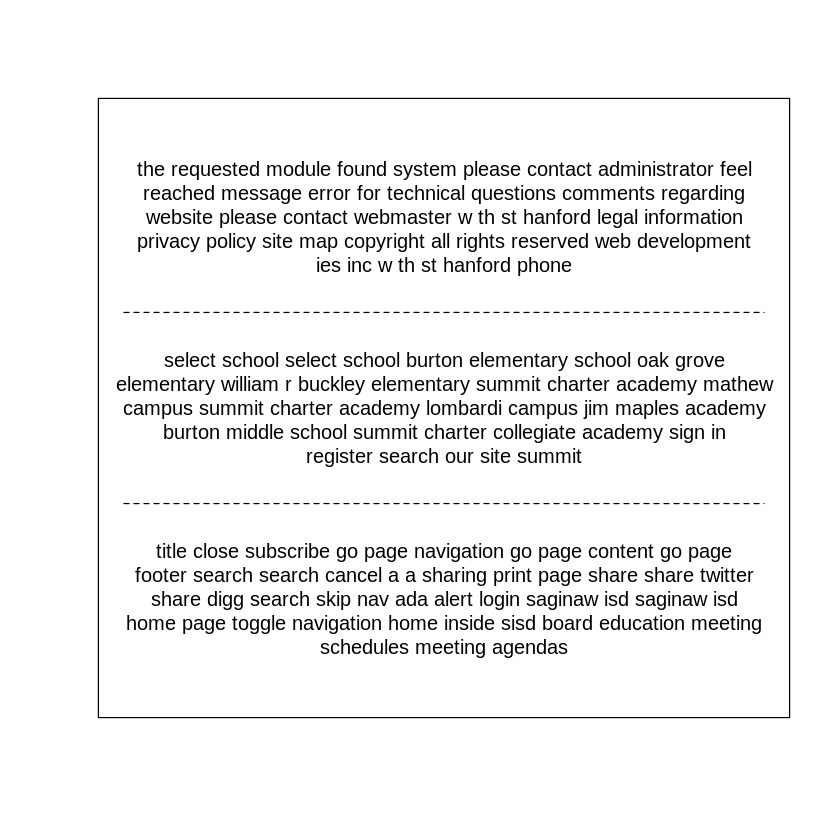

In [34]:
# plot the document strings
plotQuote(findThoughtsObj$docs[[1]], width = 70, text.cex = 1, maxwidth = 300)

In [19]:
#Write a function to extract the school ID from the data table using 
get.id <- function(x) {
    data[x,]$ncessch
}

In [24]:
#Separate the topic numbers, document index, and school ID into separate vectors
TOPIC <- c(10,10,10,13,13,13,14,14,14,16,16,16,17,17,17)
DOC_INDEX <- c(535,557,2747,4332,4323,4318,3449,2055,3364,161,331,3300,4713,99,3560)
NCESSCH <- sapply(DOC_INDEX, FUN = get.id)

#Create R dataframe and join this dataframe with the URL table
x <- data.frame(TOPIC, DOC_INDEX, NCESSCH)

#Merge dataframes 'x' and 'url' on school ID
df <- merge(x=x,y=urls,by="NCESSCH", all.x=TRUE)
df

NCESSCH,TOPIC,DOC_INDEX,URL,SHARED_URL,NAME1516,ADDRESS1516
<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>
40014901897,17,99,http://www.edhswolverines.com/,0,Kaizen Education Foundation dba El Dorado High School,"2200 N. Arizona Ave. , Chandler AZ 85224.0"
40030303307,16,161,http://www.northstaraz.com/,0,Cyber High School,"10443 N Cave Creek Road , Phoenix AZ 85020.0"
40088003398,16,331,http://southwestleadershipacademy.com/,0,Southwest Leadership Academy,"4301 West Fillmore Street , Phoenix AZ 85043.0"
60318011283,10,535,http://www.auesd.com/CCA,0,Crossroads Charter,"418 W. 8th St. , Hanford CA 93230.0"
60657012691,10,557,http://www.burtonhorizon.org/,0,Burton Horizon Academy,"1414 W. Olive Ave. , Porterville CA 93257.0"
120144004115,14,2055,http://oaklandfl.gov/230/Oakland-Avenue-Charter-School,0,OAKLAND AVENUE CHARTER,"456 E OAKLAND AVE , OAKLAND FL 34760.0"
260031801911,10,2747,http://www.sisd.cc/,0,Saginaw Learn to Earn Academy,"1000 Tuscola St , Saginaw MI 48607.0"
350015000785,16,3300,http://mosaicacademy.net/,0,MOSAIC ACADEMY CHARTER,"100 SOUTH OLIVER , AZTEC NM 87410.0"
370009302480,14,3364,http://tjca.teamcfa.school/,0,Thomas Jefferson Class Academy,"2527 US 221A Hwy , Mooresboro NC 28114.0"


## estimateEffect

In [7]:
ls()

[1] "asian_effect"            "black_effect"           
 [3] "black_hispanic"          "black_hispanic_district"
 [5] "charterSelect"           "data"                   
 [7] "docs"                    "hispanic_effect"        
 [9] "hispblack_district"      "hispblack_effect"       
[11] "meta"                    "model"                  
[13] "out"                     "processed"              
[15] "urls"                    "vocab"                  
[17] "whasian_district"        "whasian_effect"         
[19] "white_black"             "white_black_district"   
[21] "white_effect"            "white_hispanic"         
[23] "white_hispanic_district"

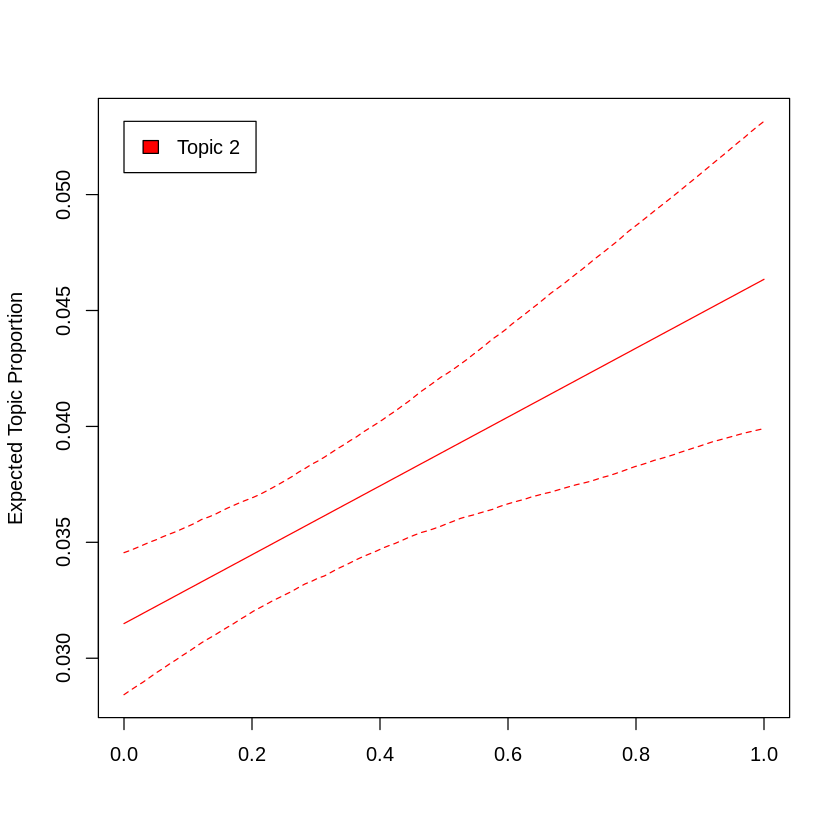

In [27]:
plot(black_effect, "black_students", topics = black_effect$topics[2], method = c("continuous"))